# Training Models


In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

**Linear Regression** makes variation by calculating the weighted sum of the input features + the bias term (intercept):

$$
\hat{y} = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + ... + \theta_{n} x_{n}
$$



<details>

<summary>Equation terms</summary>

- $\hat{y}$: Is the predicted value.
- $\alpha$: Is the constant value that represents the intercept of the line with the vertical axis.
- $\beta$: Is the slope, the **angular coefficient**.
- $X$: Is the independent variable.
  
</details>

The equation can also be expressed in vectorized form, for simplicity:

$$
\hat{y} = h_{\theta} (x) = \theta \cdot x
$$

Once you have the desired model, you can train it by _adjusting the parameters until they fit the data well_. A common metric for this is the **MSE** (Mean Squared Error).

In the following examples, the **MSE** will be used as the _cost function_:

$$
MSE = \frac{1}{m} \sum (\theta ^{T} x^{(i)} - y^{(i)})^{2}
$$

## The Normal Equation <a id="Anotherway"></a>

The **Normal Equation** is a _closed solution_ (gives the result directly) to find the value of $\theta$ that minimizes the MSE:

$$
\hat{\theta} = (X^{T} X)^{-1} X^{T} y
$$

To better visualize, a data similar to the linear one will be created:

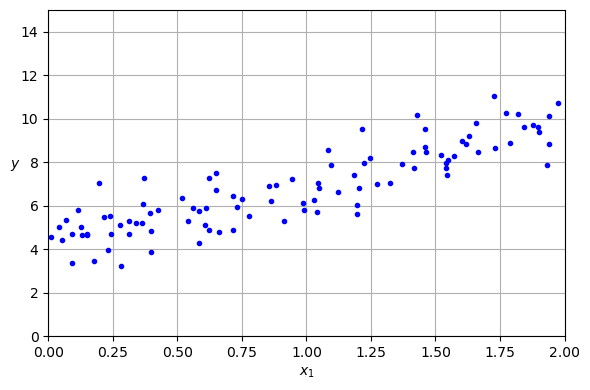

In [9]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

###########################################################

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

Below, we see the representation of the _Normal Equation_ in code format:

In [11]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [12]:
theta_best

array([[4.21509616],
       [2.77011339]])

The values identified were close to the exact value ($3x+ 4$). Is possible to use this value to fit another set:

In [14]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

 Below we see a graph that demonstrate the result of regression:

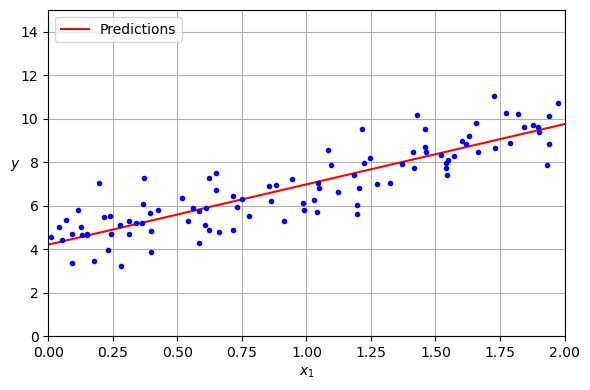

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

To perform the same process using `sklearn` is similar:

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [19]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

##  Computational Complexity

#  Gradient Descent

**Gradient Descent** interactively adjusts parameters to minimize the cost function.

Basically, the algorithm operates by starting randomly, measuring the local gradient of the error function with the parameter $\theta$ and reducing the _Cost Function_ (MSE) until it converges to a minimum.

Some of the most important parameters of this algorithm are the _number of steps_, which dictates how many steps it will take, and the _Learning Rate_, which determines the size of each step.

If the _Learning Rate_ is **too large**, it will pass the _Global Minimum_ and will not converge.

If the _Learning Rate_ is **too small**, it will take a long time to converge, or it will not converge to the _Global Minimum_.

In some cases, there is both a _Local Minimum_ and a _Global Minimum_, but this does not apply to the MSE case.

## Batch Gradient Descent 

It is necessary to calculate for each parameter $\theta _{j}$ present in the model for the implementation of Gradient Descent. For this, the gradient of the cost function and the implementation of the following equation are used:

$$
\theta^{(next \:\: step)} = \theta - \eta \nabla _{\theta} MSE(\theta)
$$


Where


$$
\nabla _{\theta} MSE(\theta) = \frac{2}{m} X^{T}(X \theta - y)
$$


The equation below demonstrates the behavior of the variation of the _Learning Rate_ $\eta$ :

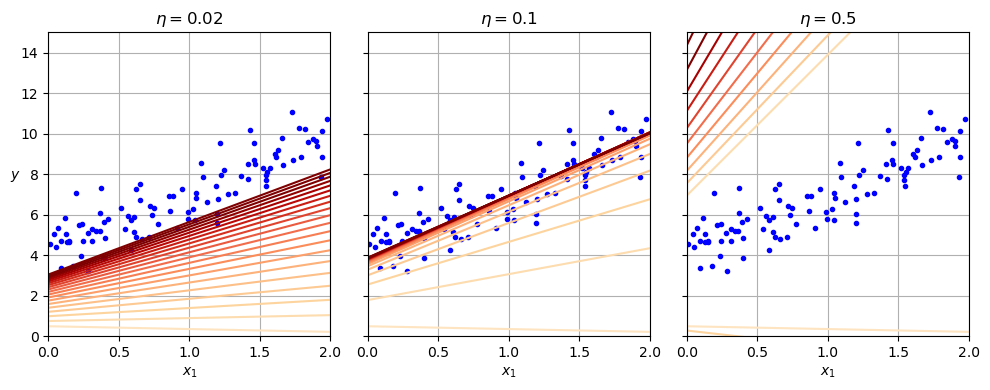

In [28]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()


To define an optimal number of **epochs**, if it is too low you will not reach the best solution, and if it is too high you will iterate for a long time without changes. 

The ideal is to define a value $\epsilon$ that will be the limit called _Tolerance_ to stop iterating when the changes reach a minimum.

## Stochastic Gradient Descent 

**Stochastic Gradient Descent** randomly chooses a point to compute the gradients and updates the parameters based on that.

The algorithm compared to _BGD_ is much faster, but due to its stochastic (random) nature, but when it approaches the minimum it is "bouncing" around it. This is useful for _escaping local minima_, but it _never reaches exactly a global minimum_, it just gets closer.

This drawback can be overcome by _gradually decreasing the leaerning rate_.

## Mini-Batch Gradient Descent 

The **Mini Batch Gradient Descent** algorithm operates with similar characteristics to the previous algorithms. **Batch GD** computes the gradients on the entire training set, **SGD** operates based on a single instance, and **Mini Batch GD** uses _Mini Batches_, which are small random sets of the training set.

Its speed is higher than **SGD**, but it has more difficulty escaping _local minima_.

# Polynomial Regression

**Polynomial Regressions** are used when _Linear_ is unable to provide the correct results. They can be performed either by adding a higher degree polynomial, or by using the `PolynomialFeatures` class.

In [40]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

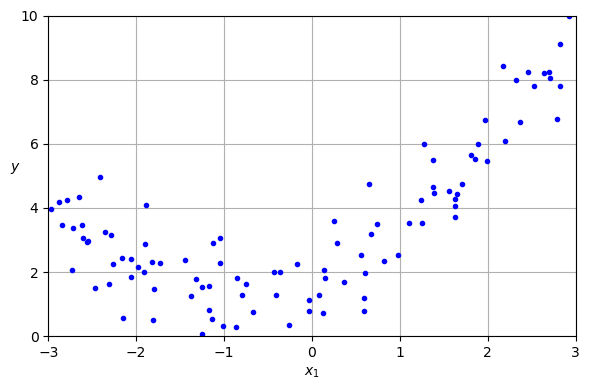

In [41]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

Below we see an example of an attempted fit using a second-degree polynomial:

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) # Use an equation of second degree to adjust the data
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

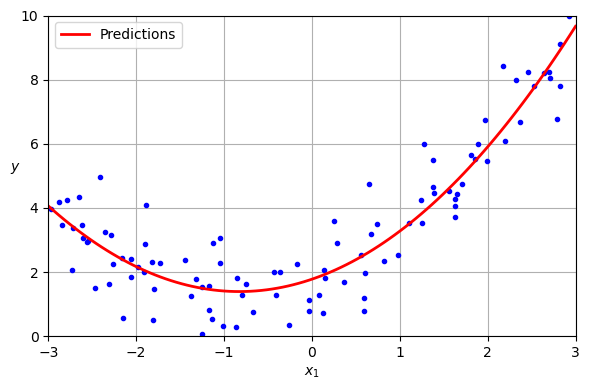

In [44]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

It is also possible to observe the behavior of different polynomial degrees, where the highest degrees present _Overfitting_

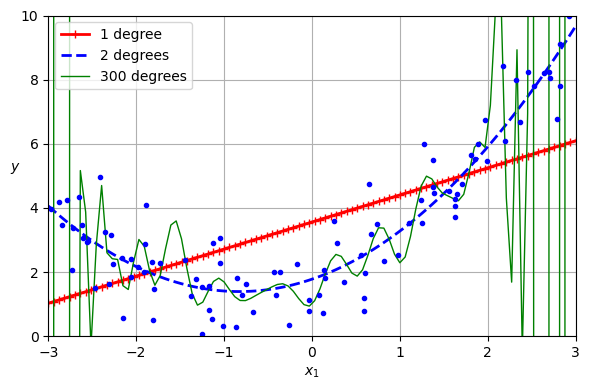

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

# Learning Curves

In most cases, it is not known which polynomial generated the data or best fits it. If we use a very low degree, it is too far from the real model, and if we use a very high degree, overfitting occurs.

Remembering what was discussed in chapter 2, overfitting performs well on the training set, and worse on the test set, and underfitting performs poorly on both.

One way to analyze the best fit is to use Learning Curves, analyzing training and validation error curves (in this case, RMSE) plotted in relation to the number of instances.

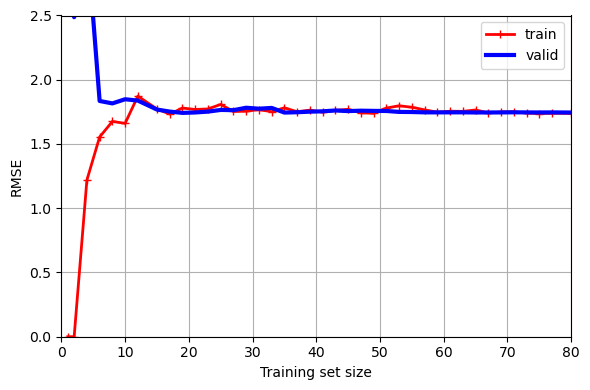

In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
save_fig("underfitting_learning_curves_plot")

plt.show()

Above we see an example of underfitting, where a plateau is reached and the curves overlap.

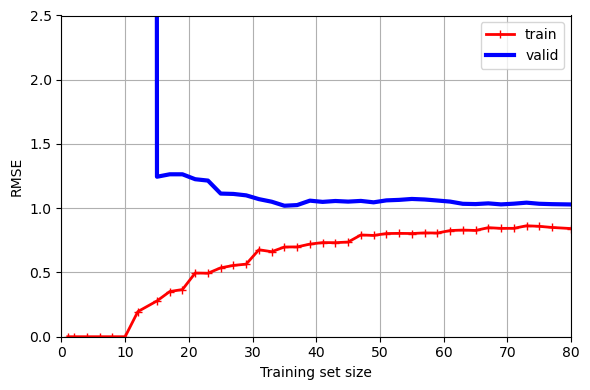

In [51]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")


train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

In the graph above we see an example of overfitting, where the curves start separately and get closer, but still remain at a considerable distance.

# Regularized Linear Models

**Regularization** is a way to reduce overfitting. It operates by reducing the degrees of freedom in the data set (i.e. reducing the polynomial degree)

## Ridge Regression

Ridge regression is a regularized version of linear regression. It works by adding a regularization function to the cost function, in the case of Ridge, l2. Below we see an example applied to the MSE cost function.

$$
J(\theta) = MSE(\theta) + \frac{\alpha}{m} \sum^{n}_{i=1} \theta^{2}_{i}
$$

The alpha hyperparameter controls how regularized the terms will be. Below we see the behavior of different alpha values.

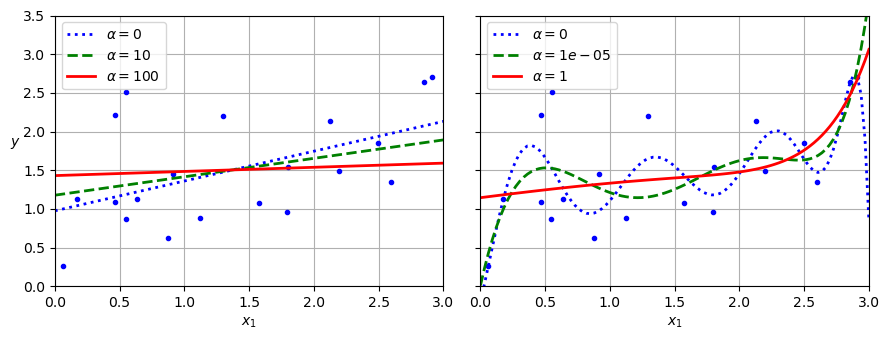

In [59]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)



from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])



def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression_plot")
plt.show()

It is possible to use Ridge regularization either through its own class or through **SGD**.

In [61]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55325833])

## Lasso Regression

Lasso regression operates in a similar way to Ridge regression, the difference being that the regularization function **uses l1**, not l2.

$$
J(\theta) = MSE(\theta) + 2 \alpha \sum^{n}_{i=1} |\theta_{i}|
$$

Below we see the behavior of the alpha hyperparameter

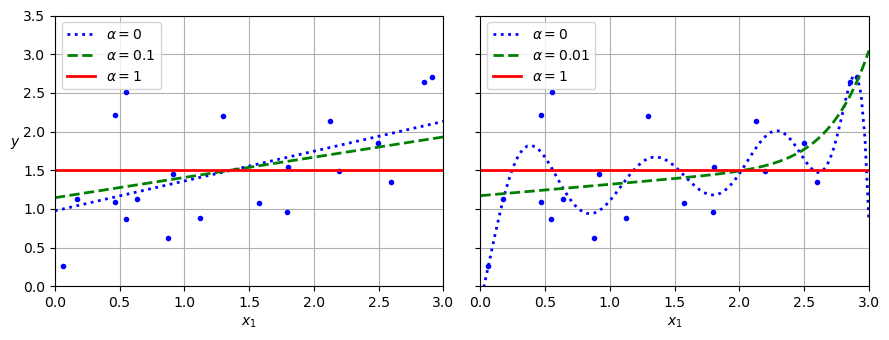

In [66]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

# extra code – this cell generates and saves Figure 4–18
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("lasso_regression_plot")
plt.show()

An important distinction between lasso and ridge is that lasso tends to completely remove unimportant features (setting its weight to zero).

It is possible to use Lasso regression with either its own function or with SGD.

In [68]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net regression

Elastic Net regression uses both Ridge and Lasso regression. Using the r value, you can determine how much of each regression is used.

$$
J(\theta) = MSE(\theta) + r(2 \alpha \sum^{n}_{i=1} |\theta_{i}|) + (1-r) (\frac{a}{m} \sum^{n}_{i=1} \theta^{2}_{i}) = MSE(\theta) + (r)Lasso(\theta) + (1-r) Ridge(\theta)
$$

In [72]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early stopping

Early stopping is a regularization method that consists of stopping when it reaches a minimum. It operates mainly on the validation error curve, when it reaches a minimum (and will go up again after that).

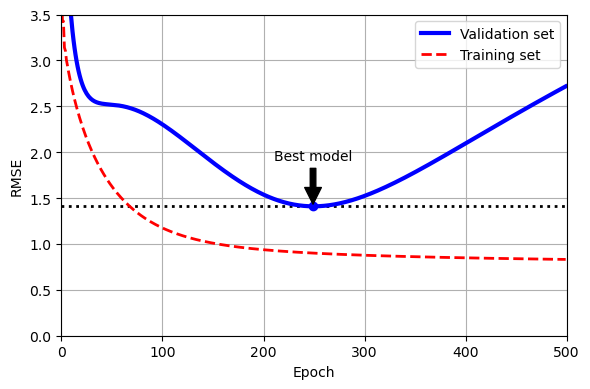

In [85]:
from sklearn.linear_model import SGDRegressor



try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)



from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
save_fig("early_stopping_plot")
plt.show()

When using the partial_fit() method, you get the best RMSE from the validation error, but you continue training, however, retaining the best variables.

# Logistic Regression


**Logistic Regression** can be used for both regression and classification.

##  Estimating Probabilities

Works similar a _Linear Regresssion_, calculating a weighted sum of the imput features and the bias. After that, regurn a _logistic_ of this result, that would be an **sigmoid function** that retunr numbers between 0 and 1, as the equation below:

$$
\hat{p} = h_{\theta}(x) = \sigma (\theta ^{T} x)
$$

Assuming a threshold of 50%, the results of the $\hat{y}$ predictions arising from the $\hat{y}$ probabilities are:

$$
\hat{y} = \left\{ \begin{matrix}
0 \: \: \: if \: \: \: \hat{p} < 0.5 \\
1 \: \: \: if \: \: \: \hat{p} \geq 0.5
\end{matrix} \right.
$$

##  Training and Cost Function

The _Cost Function_ aims to differentiate high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0)

$$
c(\theta) = 
\left\{ 
\begin{matrix}
-log(\hat{p}) \: \: \: if \: \: \: y = 1 \\
-log(1 - \hat{p}) \: \: \: if \: \: \: y = 0
\end{matrix}
\right.
$$

The _Cost Function_ for the entire training dataset is expressed by the average of these calculated values, called _Log Loss_:

$$
J(\theta) = \frac{1}{m} \sum^{m}_{i=1} 
[
(y^{(i)}) log(\hat{p}^{(i)}) + (1 - y^{(i)}) log(1 - \hat{p}^{(i)})
]
$$

Although there is no closed solution for the equation, it is possible to apply it in SGD from the _Logistic cost function partial derivatives_:

$$
\frac{\partial}{\partial \theta _{j}} = 
\frac{1}{m} \sum^{m}_{i=1} (\sigma (\theta ^{T} x^{(i)}) - y^{(i)}) x^{(i)}_{j}
$$

## Decision Boundaries

To explain **Decision Boundaries**, we will use a binary classifier for the iris flowers dataset, to detect the _Iris Virgnica_ type from the petal width (_petal width (cm)_) feature.

In [87]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

We will use the petal width feature, varying its size from 0cm to 3cm to make predictions (in real data we have a minimum value of 0.1cm and a maximum of 2.5cm)

In [90]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

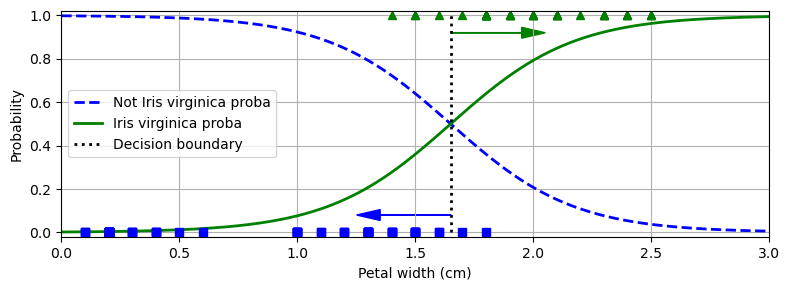

In [92]:
plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

The green triangles represent _Iris Virginicas_ and the blue squares represent other flowers. The vertical black line represents the _Decision Boundary_, and the others represent the probabilities of being (green) and not being (blue) _Iris Virginicas_. We can see a few things in this graph:

- The _Decision Boundary_ is approximately 1.6cm, which means that it will not classify values ​​with much confidence in ranges close to this number;
- Values above 2cm have a high probability (>80%) of being classified as _Iris Virginica_
- Values below 1.3cm have a high probability (>80%) of being classified as a different flower.

It is also possible to use more than one feature to perform the classification. Below we will demonstrate the use of features petal length and petal width to classify the flower as _Iris Virginica_ or something different.

In [96]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=42)

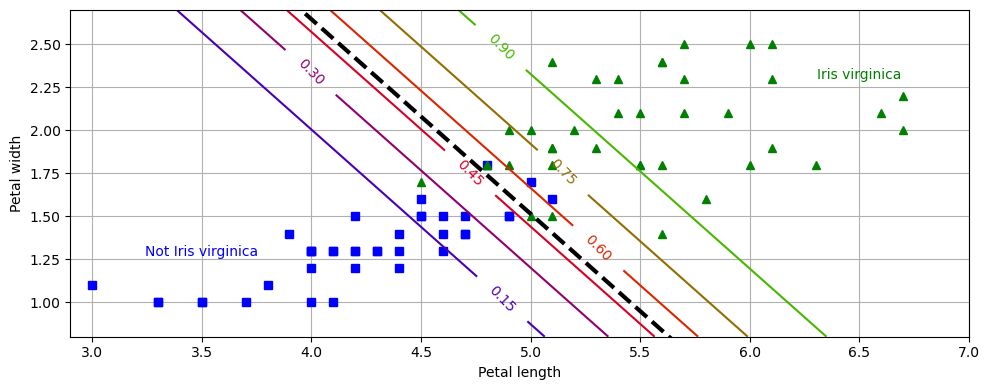

In [98]:
# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")
plt.show()

In the graph above we observe the probabilities of each section being the flower _Iris Virginica_, where the black drawn line represents the 50% probability.

##  Softmax Regression


**Softmax Regression**, or _Multinomial Logistic Regression_, can classify several classes simultaneously. From an instance **x**, a score $s_{k}(x)$ is computed for each class $k$, and the probability $\hat{p}_{k}$ for each class k in the instance is estimated using the **Softmax Function**.

$$
s_{k}(x) = (\theta ^{k})^{T}x
$$

$$
\hat{p}_{k} = \sigma (s(x))_{k} = \frac{exp(s_{k}(x))}{\sum_{j=1}^{K}exp(s_{j}(x))}
$$

Then, to define which class the instance is most likely to belong to, the `argmax` operator is used, which returns the value of a variable that maximizes a function.

$$
\hat{y} = argmax _{k} \sigma (s(x))_{k} = argmax _{k} s_{k}(x)
= argmax _{k} ((\theta^{(k)})^{T} x)
$$

To minimize the _Cost Function_, **Cross Entropy** is used, which works by penalizing the model when it estimates _low probabilities_ for the target class. It is also used to see how well the _predicted_ classes fit the _targets_. 

$$
J(\Theta) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{k}^{(i)} log(\hat{p} _{k} ^{(i)})
$$

The _Gradient Vector_ can be used with the following equation for application in SGD:

$$
\nabla _{\theta} ^{(k)} = \frac{1}{m} \sum^{m}_{i=1} (
\hat{p}_{k}^{(i)} -  y_{k}^{(i)}
) x^{(i)}
$$

The code operates in the same way as _LogisticRegression_, even with the same library, being automatically selected when there are more than two classes. Do the regularizations l1 and l2 change as the hyperparameter C changes, as shown in the code below?

In [112]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

Making a prediction just below, for a flower with petal width of XX and petal length of YY, we see the following probabilities for each class:


- Iris setosa: 0%
- Iris versicolor: 4%
- Iris virginica: 96%

In [115]:
softmax_reg.predict([[5, 2]])

softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

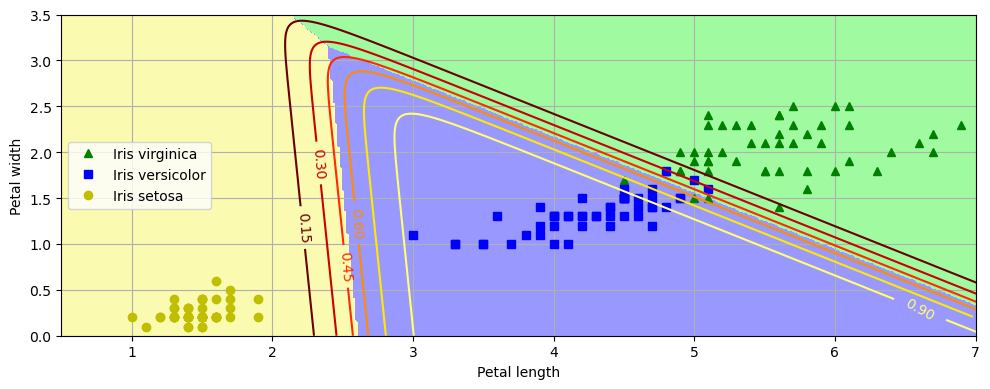

In [117]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
save_fig("softmax_regression_contour_plot")
plt.show()
